In [1]:
import sys
import os
import config
sys.path.append(config.root)
import pandas as pd
import geopandas as gpd 
import glob
from utils.tiff_io import readTiff
import numpy as np
from pyproj import Proj
from shapely.geometry import Point
import pprint
import matplotlib.pyplot as plt

In [17]:
paths_truth = glob.glob(config.root+'/data/dataset-l578/truth/*.tif')
paths_truth = sorted(paths_truth)
names_truth = [os.path.basename(path) for path in paths_truth]
names_satellite = [name[0:2] for name in names_truth]


### Get center coordinates (wgs84) of the landsat scenes

In [18]:
centers_wgs84 = []
for path in paths_truth:
    img_src, img = readTiff(path)
    bound = img_src.bounds
    utm_proj = Proj(img_src.crs)
    lon, lat = utm_proj((bound[0], bound[2]),(bound[1], bound[3]), inverse=True)
    center = [round(sum(lon)/2, 3), round(sum(lat)/2, 3)]
    centers_wgs84.append(Point(center))  # 
print('number of centers:',len(centers_wgs84))


number of centers: 17


In [19]:
## writh the data information to geopandas
dic = {'satellite': names_satellite,
    'name': names_truth,
        }
df = pd.DataFrame(dic)
geodf = gpd.GeoDataFrame(df, geometry=centers_wgs84, crs='EPSG:4326')
geodf.head()

,satellite,name,geometry
0,l5,l5_scene_01_truth.tif,POINT (119.57000 -29.09500)
1,l5,l5_scene_02_truth.tif,POINT (66.38300 59.88000)
2,l5,l5_scene_03_truth.tif,POINT (61.77500 46.04500)
3,l5,l5_scene_06_truth.tif,POINT (-95.08000 63.83000)
4,l5,l5_scene_07_truth.tif,POINT (-113.12000 26.90000)


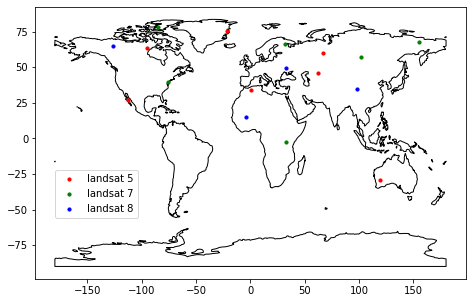

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.dissolve()
world.plot(ax=ax, color='white', edgecolor='black')
geodf[geodf.satellite=="l5"].plot(ax=ax, marker='o', markersize=10, color='red', label='landsat 5')
geodf[geodf.satellite=="l7"].plot(ax=ax, marker='o', markersize=10, color='green', label='landsat 7')
geodf[geodf.satellite=="l8"].plot(ax=ax, marker='o', markersize=10, color='blue', label='landsat 8')
ax.legend(bbox_to_anchor=(.25, .42))


In [21]:
# path_fig = config.root + '/figures/dset_distribution'
# fig.savefig(path_fig)
